In [1]:
import pyodbc
server = 'daqsamsrv01.database.windows.net'
database = 'daqdb01'
username = 'marcos'
password = 'Asdf*123'   
driver= '{ODBC Driver 17 for SQL Server}'

with pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password) as conn:
    with conn.cursor() as cursor:
        cursor.execute("SELECT TOP 3 name, collation_name FROM sys.databases")
        row = cursor.fetchone()
        while row:
            print (str(row[0]) + " " + str(row[1]))
            row = cursor.fetchone()

master SQL_Latin1_General_CP1_CI_AS
daqdb01 SQL_Latin1_General_CP1_CI_AS


In [26]:
import pyodbc
server = 'daqsamsrv01.database.windows.net'
database = 'daqdb01'
username = 'marcos'
password = 'Asdf*123'   
driver= '{ODBC Driver 17 for SQL Server}'


cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
# Insert Dataframe into SQL Server:
cursor.execute("INSERT INTO dbo.modbus_data(data_id,register, value, description) VALUES (4,15, 91.3, 'Pressure');")


cnxn.commit()
cursor.close()

In [34]:
import pyodbc
server = 'daqsamsrv01.database.windows.net'
database = 'daqdb01'
username = 'marcos'
password = 'Asdf*123'   
driver= '{ODBC Driver 17 for SQL Server}'

from datetime import datetime

def read_time():
    # datetime object containing current date and time
    now = datetime.now()
    # dd/mm/YY H:M:S
    dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
    return dt_string

cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
print("Database opened successfully")

def validator(instance):
    if not instance.isError():
        '''.isError() implemented in pymodbus 1.4.0 and above.'''
        decoder = BinaryPayloadDecoder.fromRegisters(
            instance.registers,
            byteorder=Endian.Big, wordorder=Endian.Little
        )   
        return float('{0:.2f}'.format(decoder.decode_32bit_float()))

    else:
        # Error handling.
        print("There isn't the registers, Try again.")
        return None

var5 = read_time()


cursor = cnxn.cursor()
# Insert Dataframe into SQL Server:

#query = "INSERT INTO modbus_data(register, value, description) VALUES (15, 90.7, 'Pressure')"
#r = cursor.execute(query)
var1 = 17
var2 = 'Pressure'
var3 = 90.1
var4 = 'bar'

cursor.execute("INSERT INTO modbus_data(register, value, description, created_on) VALUES (?, ?, ?, ?)",(var1,var3,var2,var5));


cnxn.commit()
cursor.close()

print("Record inserted successfully")


Database opened successfully
Record inserted successfully


In [43]:
import pandas as pd
#data = pd.read_excel(r'D:\Weatherford\Flow Measurements\Research\Modbus_Reg_AFC.xlsx')
data = pd.read_excel(r'/Users/marcossoto/Documents/Modbus_DDS.xlsx')

print("Data Loaded OK")
x = data[data['leer']==1][['read','Description','Unit / Remark']]


from pymodbus.constants import Endian
from pymodbus.payload import BinaryPayloadDecoder
from pymodbus.client.sync import ModbusTcpClient

def validator(instance):
    if not instance.isError():
        '''.isError() implemented in pymodbus 1.4.0 and above.'''
        decoder = BinaryPayloadDecoder.fromRegisters(
            instance.registers,
            byteorder=Endian.Big, wordorder=Endian.Little
        )   
        return float('{0:.2f}'.format(decoder.decode_32bit_float()))

    else:
        # Error handling.
        print("There isn't the registers, Try again.")
        return None


client = ModbusTcpClient('192.168.0.200', port=502)  # Specify the port.

connection = client.connect()

if connection:

    for i in x['read']:
        j = x[x['read']==i]
        request = client.read_input_registers((int(j['read'])-2), 2, unit=1)  # Specify the unit.
        data = validator(request)
        print(j['Description'].values,"= ", data , j['Unit / Remark'].values)


        client.close()

else:
        print('Connection lost, Try again')

Data Loaded OK
['MVT Static Pressure'] =  94.0 ['Bars']
['MVT Differential Pressure'] =  0.13 ['Bars']
['MVT Temperature'] =  66.79 ['°C']
['Sonar Velocity'] =  12.13 ['m/s']
['Water Cut'] =  0.0 ['%']
['Qg – Standard Conditions'] =  123904.0 ['Configurable']
['Ql  – Standard Conditions'] =  130.64 ['Configurable']
['Qo – Standard Conditions'] =  40.01 ['Configurable']
['Qw – Standard Conditions'] =  93.37 ['Configurable']
['GVF'] =  89.0 [nan]


In [54]:

import pandas as pd
#data = pd.read_excel(r'D:\Weatherford\Flow Measurements\Research\Modbus_Reg_AFC.xlsx')
data = pd.read_excel(r'/Users/marcossoto/Documents/Modbus_DDS.xlsx')

print("Data Loaded OK")
x = data[data['leer']==1][['read','Description','Unit / Remark']]


from pymodbus.constants import Endian
from pymodbus.payload import BinaryPayloadDecoder
from pymodbus.client.sync import ModbusTcpClient

from datetime import datetime

def read_time():
    # datetime object containing current date and time
    now = datetime.now()
    # dd/mm/YY H:M:S
    dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
    return dt_string

#database connection
import pyodbc
server = 'daqsamsrv01.database.windows.net'
database = 'daqdb01'
username = 'marcos'
password = 'Asdf*123'   
driver= '{ODBC Driver 17 for SQL Server}'

cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
print("Database opened successfully")


def validator(instance):
    if not instance.isError():
        '''.isError() implemented in pymodbus 1.4.0 and above.'''
        decoder = BinaryPayloadDecoder.fromRegisters(
            instance.registers,
            byteorder=Endian.Big, wordorder=Endian.Little
        )   
        return float('{0:.2f}'.format(decoder.decode_32bit_float()))

    else:
        # Error handling.
        print("There isn't the registers, Try again.")
        return None


client = ModbusTcpClient('192.168.0.200', port=502)  # Specify the port.

connection = client.connect()
var5 = read_time()

if connection:
    
    for i in x['read']:
        j = x[x['read']==i]
        
        var1 = int(j['read'])-2
        request = client.read_input_registers(var1, 2, unit=1)  # Specify the unit.
        data = validator(request)
        
        var2 = str(j.iloc[0]['Description'])
        var3 = data
        var4 = str(j.iloc[0]['Unit / Remark'])
        
        cursor = cnxn.cursor()
        cursor.execute("INSERT INTO modbus_data(register, description, value, unit, created_on) VALUES (?, ?, ?, ?,?)",(var1,var2,var3,var4,var5));
        cnxn.commit()
        print(var2,"= ", data , var4, var5)
        
        client.close()

else:
        print('Connection lost, Try again')
        


print("Record inserted successfully")
cnxn.close()

Data Loaded OK
Database opened successfully
MVT Static Pressure =  91.0 Bars 06/06/2021 11:26:14
MVT Differential Pressure =  0.04 Bars 06/06/2021 11:26:14
MVT Temperature =  61.09 °C 06/06/2021 11:26:14
Sonar Velocity =  7.59 m/s 06/06/2021 11:26:14
Water Cut =  0.0 % 06/06/2021 11:26:14
Qg – Standard Conditions =  184320.0 Configurable 06/06/2021 11:26:14
Ql  – Standard Conditions =  60.43 Configurable 06/06/2021 11:26:14
Qo – Standard Conditions =  35.19 Configurable 06/06/2021 11:26:14
Qw – Standard Conditions =  19.89 Configurable 06/06/2021 11:26:14
GVF =  96.5 nan 06/06/2021 11:26:14
Record inserted successfully


In [18]:
import pyodbc
import pandas as pd
server = 'daqsamsrv01.database.windows.net'
database = 'daqdb01'
username = 'marcos'
password = 'Asdf*123'   
driver= '{ODBC Driver 17 for SQL Server}'


cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
# Insert Dataframe into SQL Server:

query = "SELECT * FROM modbus_data"

ds = pd.read_sql(query,cnxn)

cnxn.commit()
cursor.close()


d1 = pd.pivot_table(ds,values=['value'],index=['created_on'],columns=['Description'], aggfunc='first')


d1 = pd.DataFrame(d1.to_records())
d1.columns = [hdr.replace("('value', '", "").replace("')", "") \
                     for hdr in flattened.columns]

d1.head()


,created_on,GVF,MVT Differential Pressure,MVT Static Pressure,MVT Temperature,Pressure,Qg – Standard Conditions,Ql – Standard Conditions,Qo – Standard Conditions,Qw – Standard Conditions,Sonar Velocity,Water Cut
0,2021-06-06 10:41:16,NaN,NaN,NaN,NaN,90.1,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-06-06 11:14:49,NaN,0.03,90.5,60.9,NaN,180224,24.88,15.38,8.92,7.65,30.31
2,2021-06-06 11:16:26,NaN,0.03,90.5,58.97,NaN,183296,24.21,47.05,89.17,9.02,28.57
3,2021-06-06 11:18:27,NaN,0.06,91,58.46,NaN,111104,81.06,25.14,22.95,5.67,27.7
4,2021-06-06 11:19:54,NaN,0,90,61.51,NaN,150528,NaN,NaN,NaN,7.64,30.1


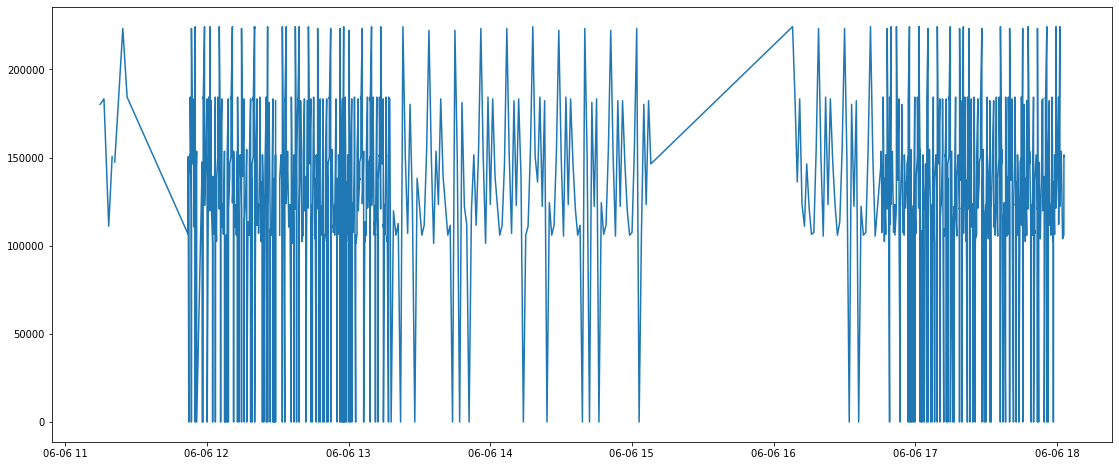

In [16]:

mask = (d1['created_on'] > '2021-05-22 21:00:00') & (d1['created_on'] <= '2022-05-22 22:00:00')

d1 = d1.loc[mask]

d1 = d1.set_index('created_on')

d1.index = pd.to_datetime(d1.index)



import matplotlib.pyplot as plt
import numpy as np
#y = ds['Qg – Standard Conditions'].astype(float)
fig, ax = plt.subplots(1,figsize=(19,8),sharex=True)

plt.plot(ds.index,ds['Qg – Standard Conditions'])
plt.show()

